In [ ]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# load the data
data = pd.read_csv('Mall_Customers.csv')

Here, we see that there is a lot of variation in the magnitude of the data. 

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [ ]:
# data overview
print('Overall Data: ' + str(data.shape))
data.head()

Overall Data: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Cleaning

In [ ]:
#Checking for Null values
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# drop ID column
data = data.drop('CustomerID', 1)

In [ ]:
#StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, so that each column/feature/variable will have μ = 0 and σ = 1
# normalize values
# standardizing the data

scaler = StandardScaler()
#Using only spending_score and Annual  income varibale for easy visulization.
data_scaled = scaler.fit_transform(data[data.columns[2:]])
print('Type of data Scaled :{} '.format(type(data_scaled)))

# statistics of scaled data
data_A = pd.DataFrame(data_scaled).describe()
data_A

Type of data Scaled :<class 'numpy.ndarray'> 


,0,1
count,2.000000e+02,2.000000e+02
mean,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[2:])
data_scaled

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# Clustering using K-Means

In this section we will perform K-Means clustering on the data and check the clustering metrics (inertia)



Text(0, 0.5, 'Inertia')

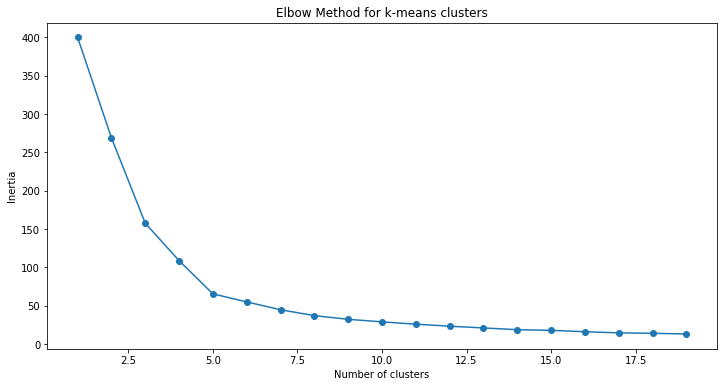

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.title('Elbow Method for k-means clusters')
plt.ylabel('Inertia')

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results.

Remember in lecture we said that this algorithm randomly initialize the centroids in k-means clustering? Well, this is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. We are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [ ]:
# inertia on the fitted data
kmeans.inertia_

270.1559035072793

In [ ]:
# k means using 5 clusters and k-means++ initialization

def k_means_function(clusters,df):
  kmeans = KMeans(n_clusters = clusters, init='k-means++')
  kmeans.fit(data_scaled)
  pred = kmeans.predict(data_scaled)
  kmeans.cluster_centers_
  return(pred,kmeans.cluster_centers_)

In [ ]:
pred_3, Centroid_3 = k_means_function(3,data_scaled)
pred_4, Centroid_4 = k_means_function(4,data_scaled)
pred_5, Centroid_5 = k_means_function(5,data_scaled)
pred_6, Centroid_6 = k_means_function(6,data_scaled)
pred_7, Centroid_7 = k_means_function(7,data_scaled)


In [ ]:
#Data count for nummber of clusters = 3
unique,counts =np.unique(pred_3, return_counts=True)
print(np.array((unique,counts)).T)


[[  0  39]
 [  1  38]
 [  2 123]]


In [ ]:
#Changing Data to the numpy array for ease in plotting
df_Scaled = np.array(data_scaled)



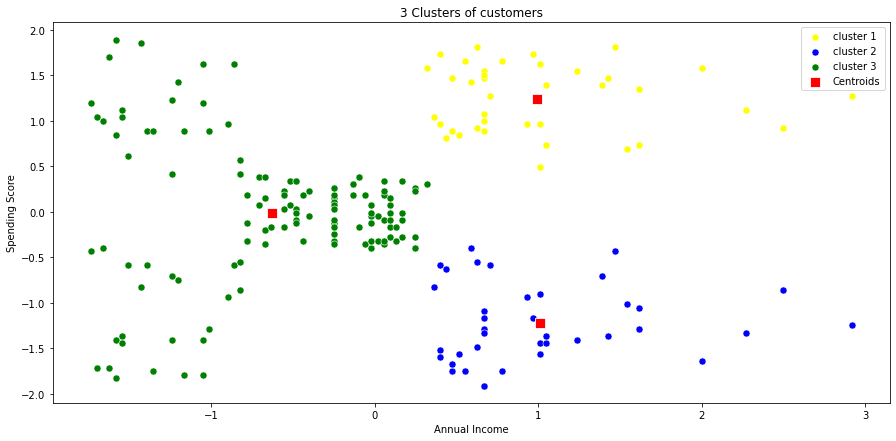

In [ ]:
#Visualising the clusters of size 3

plt.figure(figsize =(15,7))

sns.scatterplot(df_Scaled[pred_3 == 0, 0], df_Scaled[pred_3 == 0, 1], color='yellow',label= 'cluster 1',s=50) 
sns.scatterplot( df_Scaled[pred_3 == 1,0], df_Scaled[pred_3 == 1,1], color='blue',label= 'cluster 2',s=50) 
sns.scatterplot( df_Scaled[pred_3 == 2,0], df_Scaled[pred_3 == 2,1], color='green',label= 'cluster 3',s=50) 
sns.scatterplot (Centroid_3[:,0], Centroid_3[:,1], color='red', label ='Centroids',s=100,marker=",")

plt.grid(False)

plt.title('3 Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

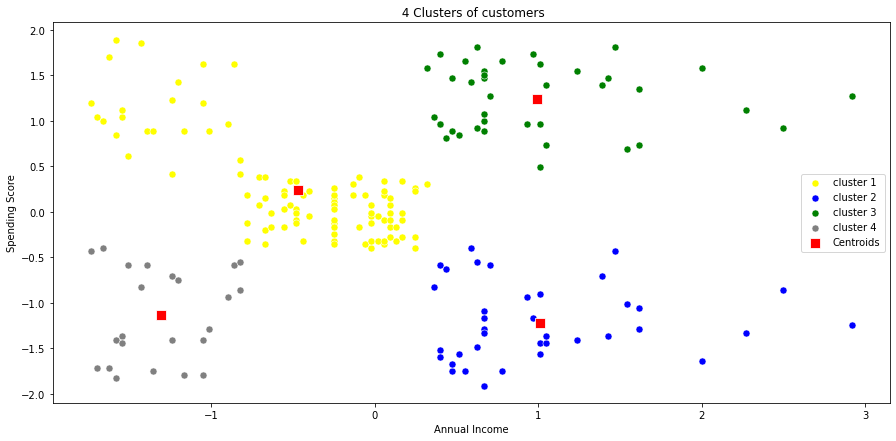

In [ ]:
#Visualising the clusters of size 4

plt.figure(figsize =(15,7))

sns.scatterplot(df_Scaled[pred_4 == 0, 0], df_Scaled[pred_4 == 0, 1], color='yellow',label= 'cluster 1',s=50) 
sns.scatterplot(df_Scaled[pred_4 == 1,0], df_Scaled[pred_4 == 1,1], color='blue',label= 'cluster 2',s=50) 
sns.scatterplot(df_Scaled[pred_4 == 2,0], df_Scaled[pred_4 == 2,1], color='green',label= 'cluster 3',s=50) 
sns.scatterplot(df_Scaled[pred_4 == 3,0], df_Scaled[pred_4 == 3,1], color='grey',label= 'cluster 4',s=50) 
sns.scatterplot (Centroid_4[:,0], Centroid_4[:,1], color='red', label ='Centroids',s=100,marker=",")

plt.grid(False)

plt.title(' 4 Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

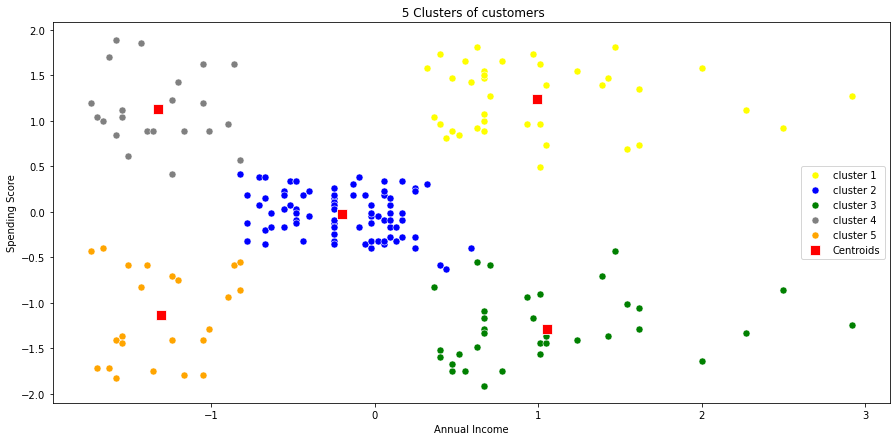

In [ ]:
#Visualising the clusters of size 5

plt.figure(figsize =(15,7))

sns.scatterplot(df_Scaled[pred_5 == 0, 0], df_Scaled[pred_5 == 0, 1], color='yellow',label= 'cluster 1',s=50) 
sns.scatterplot(df_Scaled[pred_5 == 1,0], df_Scaled[pred_5 == 1,1], color='blue',label= 'cluster 2',s=50) 
sns.scatterplot(df_Scaled[pred_5 == 2,0], df_Scaled[pred_5 == 2,1], color='green',label= 'cluster 3',s=50) 
sns.scatterplot(df_Scaled[pred_5 == 3,0], df_Scaled[pred_5 == 3,1], color='grey',label= 'cluster 4',s=50) 
sns.scatterplot(df_Scaled[pred_5 == 4,0], df_Scaled[pred_5 == 4,1], color='orange',label= 'cluster 5',s=50) 
sns.scatterplot (Centroid_5[:,0], Centroid_5[:,1], color='red', label ='Centroids',s=100,marker=",")

plt.grid(False)

plt.title(' 5 Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

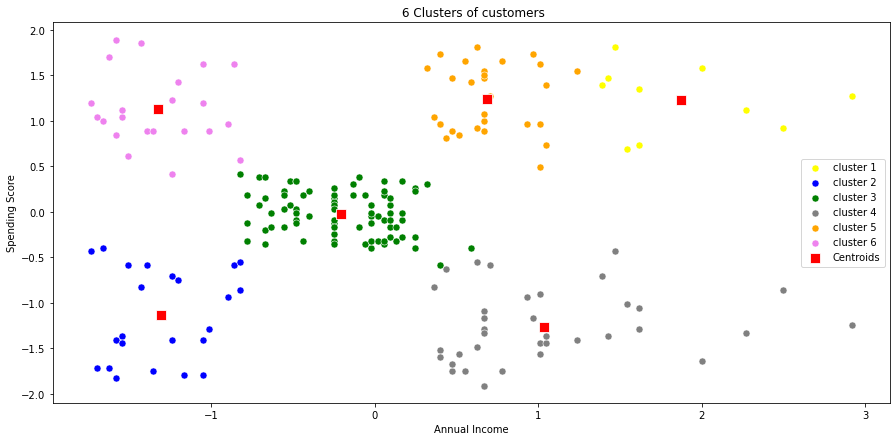

In [ ]:
#Visualising the clusters of size 6

plt.figure(figsize =(15,7))

sns.scatterplot(df_Scaled[pred_6 == 0, 0], df_Scaled[pred_6 == 0, 1], color='yellow',label= 'cluster 1',s=50) 
sns.scatterplot(df_Scaled[pred_6 == 1,0], df_Scaled[pred_6 == 1,1], color='blue',label= 'cluster 2',s=50) 
sns.scatterplot(df_Scaled[pred_6 == 2,0], df_Scaled[pred_6 == 2,1], color='green',label= 'cluster 3',s=50) 
sns.scatterplot(df_Scaled[pred_6 == 3,0], df_Scaled[pred_6 == 3,1], color='grey',label= 'cluster 4',s=50) 
sns.scatterplot(df_Scaled[pred_6 == 4,0], df_Scaled[pred_6 == 4,1], color='orange',label= 'cluster 5',s=50) 
sns.scatterplot(df_Scaled[pred_6 == 5,0], df_Scaled[pred_6 == 5,1], color='violet',label= 'cluster 6',s=50) 
sns.scatterplot (Centroid_6[:,0], Centroid_6[:,1], color='red', label ='Centroids',s=100,marker=",")

plt.grid(False)

plt.title(' 6 Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

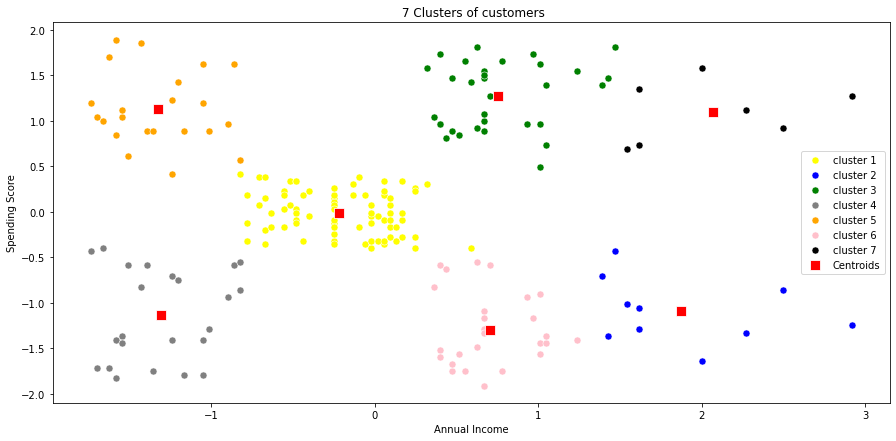

In [ ]:
#Visualising the clusters of size 7

plt.figure(figsize =(15,7))

sns.scatterplot(df_Scaled[pred_7 == 0, 0], df_Scaled[pred_7 == 0, 1], color='yellow',label= 'cluster 1',s=50) 
sns.scatterplot(df_Scaled[pred_7 == 1,0], df_Scaled[pred_7 == 1,1], color='blue',label= 'cluster 2',s=50) 
sns.scatterplot(df_Scaled[pred_7 == 2,0], df_Scaled[pred_7 == 2,1], color='green',label= 'cluster 3',s=50) 
sns.scatterplot(df_Scaled[pred_7 == 3,0], df_Scaled[pred_7 == 3,1], color='grey',label= 'cluster 4',s=50) 
sns.scatterplot(df_Scaled[pred_7 == 4,0], df_Scaled[pred_7 == 4,1], color='orange',label= 'cluster 5',s=50) 
sns.scatterplot(df_Scaled[pred_7 == 5,0], df_Scaled[pred_7 == 5,1], color='pink',label= 'cluster 6',s=50) 
sns.scatterplot(df_Scaled[pred_7 == 6,0], df_Scaled[pred_7 == 6,1], color='black',label= 'cluster 7',s=50) 
sns.scatterplot (Centroid_7[:,0], Centroid_7[:,1], color='red', label ='Centroids',s=100,marker=",")

plt.grid(False)

plt.title(' 7 Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()